In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
#%matplotlib widget
%matplotlib
plt.style.use('fivethirtyeight')

Using matplotlib backend: <object object at 0x12a432e30>


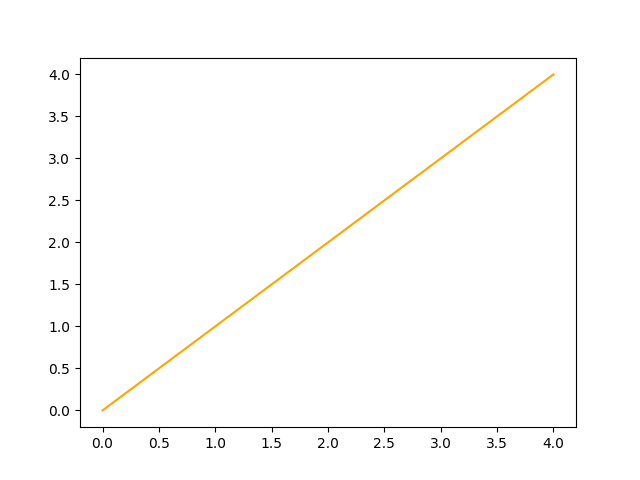

In [1]:
#%matplotlib
import torch
import matplotlib.pyplot as plt
%matplotlib widget
fig, ax = plt.subplots()
ln, = ax.plot(range(5))
ln.set_color('orange')
#plt.ion()

In [2]:
x = torch.arange(100)/10.
y = torch.sin(x)

plt.plot(x, y)
#plt.show()

NameError: name 'torch' is not defined

In [24]:
x = torch.arange(100)/10.
y = torch.sin(x)

plt.plot(x, y)

### Test against problems from Chap. 3 of D2L

#### Problem 3.3

In [7]:
# Random data for testing
torch.manual_seed(1701)

# Create synthetic data
num_train=1000
num_val=1000
w = torch.tensor([2, -3.4])
b = 4.2
n = num_train + num_val
noise = 0.1

X = torch.randn((n, len(w)))
y = X @ w.reshape(-1, 1) + b + noise


class Mydata(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index], self.y[index]


# Create dataset
dataset = Mydata(X, y)

# Create dataloader
data = DataLoader(dataset, batch_size=32)

for x, y in data:
    print (x.shape, y.shape)
    break


# Create model
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(2,1))

    def forward(self, x):
        x = self.model(x)
        return x

model = MyModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03, weight_decay=0.1)


def train(data, model, loss_fn, optimizer):
    size = len(data.dataset)
    model.train()
    for batch, (X, y) in enumerate(data):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



#train(data, model, loss_fn, optimizer)

epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(data, model, loss_fn, optimizer)
print("Done!")

#for p in model.parameters():
#    print (p)

print (f'\nThe final parameters are (with w = {w} and b = {b} as correct answer): ')
print (model.state_dict())
answ = w - model.state_dict()['model.0.weight']
ansb = b - model.state_dict()['model.0.bias']
print(f'error in estimating w: {answ}')
print(f'error in estimating b: {ansb}')





torch.Size([32, 2]) torch.Size([32, 1])
Epoch 1
-------------------------------
loss: 50.698044  [    0/ 2000]
Epoch 2
-------------------------------
loss: 0.206054  [    0/ 2000]
Epoch 3
-------------------------------
loss: 0.097946  [    0/ 2000]
Done!

The final parameters are (with w = tensor([ 2.0000, -3.4000]) and b = 4.2 as correct answer): 
OrderedDict([('model.0.weight', tensor([[ 1.9062, -3.2327]])), ('model.0.bias', tensor([4.0953]))])
error in estimating w: tensor([[ 0.0938, -0.1673]])
error in estimating b: tensor([0.1047])


In [34]:
model.state_dict()

OrderedDict([('model.0.weight', tensor([[ 2.0000, -3.3999]])),
             ('model.0.bias', tensor([4.2999]))])